<h1 align='center'><font size=5 color='MidnightBlue'>LEAD SCORING CASE STUDY USING LOGISTIC REGRESSION MODEL</font></h1>

# <font color='Chocolate'>1. PROBLEM STATEMENT</font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

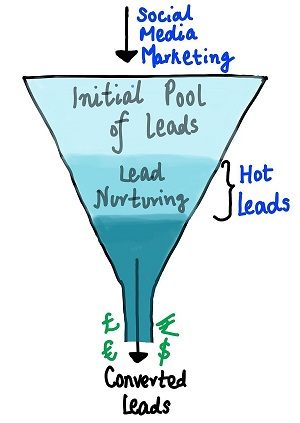

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goals of the Case Study
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Necessary Libraries

In [1]:
# Ignore warning message
import warnings
warnings.filterwarnings("ignore")

# Importing Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# <font color='Chocolate'>2. IMPORTING THE DATASET - LEAD SCORE</font>

In [2]:
leads_df = pd.read_csv('Leads.csv')

In [3]:
# Inspect leads dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# <font color='Chocolate'>3. INSPECTING AND UNDERSTANDING THE DATASET</font>

In [4]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_df.shape

(9240, 37)

### Observation:
From the Leads dataset we have total of 9240 rows and 37 columns out of which:
- 4 columns with Float datatype
- 3 columns with Int datatype
- 30 columns with Object datatype

# <font color='Chocolate'>4. DATA CLEANING</font>

In [7]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## <font color='Chocolate'>4.1 Removing Unwanted columns/variables</font>

From the above data inspection, we can drop the following columns/variables:
- **'Prospect ID', 'Lead Number'**: Indicates unique id of each record and won't be helpful for our analysis
- **'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'** : These variables are having only one category and hence can be dropped.

In [8]:
unwanted_columns = ['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads_df.drop(labels = unwanted_columns, axis=1, inplace=True)

In [9]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
leads_df.shape

(9240, 30)

## <font color='Chocolate'>4.2 Handling Missing Data

**Before handling Null/NaN values let us replace the value of 'Select' to NULL for all the variables in the given dataset as it is similar to missing data (not given/filled by the user).**

In [11]:
leads_df.replace({'Select':np.nan}, inplace=True)

In [12]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


**Now check the columns having NULL/NaN values in the given dataset and handle accordingly.**

In [13]:
# Defining a function to check the columns having NULL values
def columns_missing_data(dataset):
    result = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending=False)
    return result

In [14]:
print(columns_missing_data(leads_df))

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Observation:
- From the above results we can consider the missing values cut-off as 36% and drop the columns: **'How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City', 'Tags'**.
- Although we have high missing percentage for **'Specialization' (36.5%), 'What matters most to you in choosing a course' (29.3%), 'What is your current occupation' (29.1%), 'Country' (26.6%)** columns it can be useful for us in further analysis. So, instead dropping this column we will replace/impute NULL with 'Unknown'.
- For **'Lead Source' and 'Last Activity'** we can impute with 'Unknown' and for **'TotalVisits' and 'Page Views Per Visit'** we can impute with 0.

## <font color='MidnightBlue'>Drop Rejected Columns</font>

In [15]:
rejected_columns = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City', 'Tags']
leads_df.drop(labels = rejected_columns, axis=1, inplace=True)

In [16]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [17]:
leads_df.shape

(9240, 21)

## <font color='MidnightBlue'>Impute Missing Values</font>

In [18]:
leads_df['Specialization'] = leads_df['Specialization'].fillna('Unknown')
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].fillna('Unknown')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('Unknown')
leads_df['Country'] = leads_df['Country'].fillna('Unknown')
leads_df['Lead Source'] = leads_df['Lead Source'].fillna('Unknown')
leads_df['Last Activity'] = leads_df['Last Activity'].fillna('Unknown')
leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(np.float(0))
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].fillna(np.float(0))
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [19]:
print(columns_missing_data(leads_df))

Lead Origin                                      0.0
What is your current occupation                  0.0
A free copy of Mastering The Interview           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
Specialization                                   0.0
Lead Source                                      0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                        0.0
Do Not Call                                   

In [20]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

**Now we have treated NULL values properly and the refined dataset looks good.**

## <font color='Chocolate'>4.3 Check Duplicates</font>

In [21]:
print('Before checking duplicates')
print(f"Lead Score dataset shape: {leads_df.shape}")

Before checking duplicates
Lead Score dataset shape: (9240, 21)


In [22]:
print(leads_df.duplicated().sum())

1847


In [23]:
leads_df.drop_duplicates(inplace=True)

In [24]:
print('After checking duplicates')
print(f"Lead Score dataset shape: {leads_df.shape}")

After checking duplicates
Lead Score dataset shape: (7393, 21)


In [25]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7393 non-null   object 
 1   Lead Source                                    7393 non-null   object 
 2   Do Not Email                                   7393 non-null   object 
 3   Do Not Call                                    7393 non-null   object 
 4   Converted                                      7393 non-null   int64  
 5   TotalVisits                                    7393 non-null   float64
 6   Total Time Spent on Website                    7393 non-null   int64  
 7   Page Views Per Visit                           7393 non-null   float64
 8   Last Activity                                  7393 non-null   object 
 9   Country                                        7393 

### Observation:
We found that there are **1847** duplicate records in Leads dataset which may impact our analysis. Hence we dropped these records from the dataset.

## <font color='Chocolate'>4.4 Handling Outliers</font>

Let us check the following continuous numerical variables if any outliers exists in it:
- **TotalVisits**
- **Page Views Per Visit**

In [26]:
# Define a function to plot boxplot for identifying outliers of continuous variables
def boxplot_outlier(df, labels):
    plt.figure(figsize=(15,10))
    i, j = len(labels) // 2 + 1, 2
    for index, column in enumerate(labels):
        plt.subplot(i, j, index+1)
        sns.boxplot(df[column])
    plt.show()

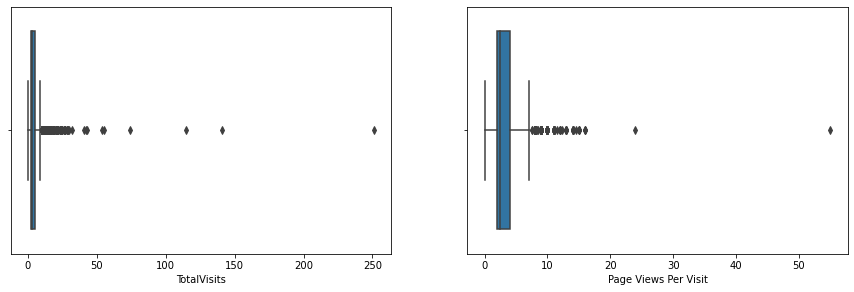

In [27]:
numerical_vars = ['TotalVisits', 'Page Views Per Visit']
boxplot_outlier(leads_df, numerical_vars)

In [28]:
leads_df[['TotalVisits', 'Page Views Per Visit']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,TotalVisits,Page Views Per Visit
count,7393.000000,7393.000000
mean,4.240768,2.907987
std,5.064538,2.041350
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,2.500000
75%,5.000000,4.000000
90%,8.000000,5.000000
95%,10.000000,6.000000
99%,18.000000,10.000000


### Observation:
We can see that there are outliers exists in **'TotalVisits'** and **'Page Views Per Visit'** continuous numerical variables. So, we delete the records which has greater than 99th percentile for these variables.

In [29]:
totalvisits_99_perc = np.quantile(leads_df['TotalVisits'], 0.99)
pageviews_99_perc = np.quantile(leads_df['Page Views Per Visit'], 0.99)
print(totalvisits_99_perc, pageviews_99_perc, sep='\n')

18.0
10.0


In [30]:
leads_df = leads_df[leads_df['TotalVisits'] <= totalvisits_99_perc]
leads_df = leads_df[leads_df['Page Views Per Visit'] <= pageviews_99_perc]
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [31]:
leads_df.shape

(7281, 21)

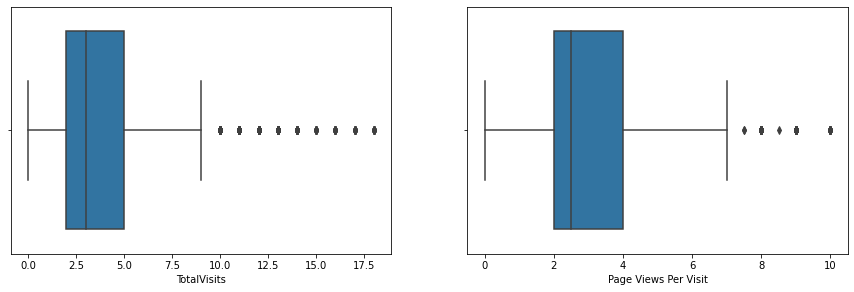

In [32]:
boxplot_outlier(leads_df, numerical_vars)

### Observation:
- Although we still see some outliers for **'TotalVisits'** and **'Page Views Per Visit'** continuous numerical variables after deleting the records that falls outside of 99th percentile but are continuous in nature. So, this should be fine and can be considered.
- After performing data cleaning process we have final dataset with **7281 rows** and **21 columns**.

# <font color='Chocolate'>5. DATA VISUALIZATION</font>

## <font color='Chocolate'>5.1 Categorical Variables w.r.t. Target Variable</font>

## <font color='MidnightBlue'>Specialization and Occupation</font>

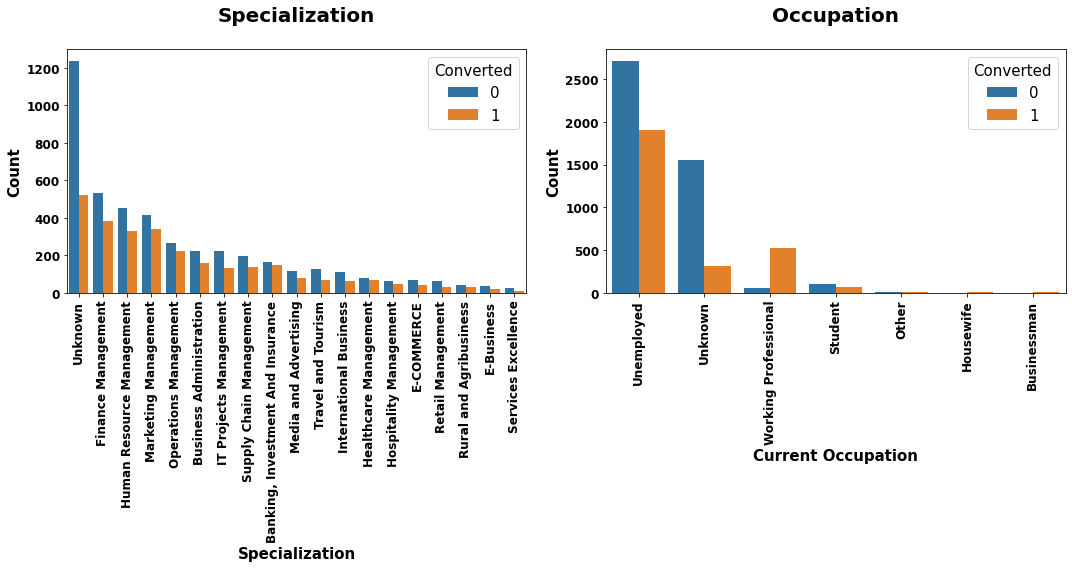

In [33]:
fig = plt.figure(figsize=(15,8))

# Specialization
plt.subplot(1,2,1)
spec_order = leads_df['Specialization'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Specialization', hue='Converted', order=spec_order)
#Title
plt.title('Specialization\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Specialization', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)

# Occupation
plt.subplot(1,2,2)
occ_order = leads_df['What is your current occupation'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='What is your current occupation', hue='Converted', order=occ_order)
#Title
plt.title('Occupation\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Current Occupation', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)

fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

### Observation:
From the above plots ignoring Unknown category, we can say that:
- Most of the customers who are working as **Finance Management** has highest conversion rate followed by **Marketing Management** and **Human Resource Management**.
- **Unemployed** Occupation category are higher in terms of population and has a decent amount of conversion rate. Customers who are **working professionals**, although their population is less than **Unemployed** but they are most likely to get converted.

## <font color='MidnightBlue'>Customer Geographical Location</font>

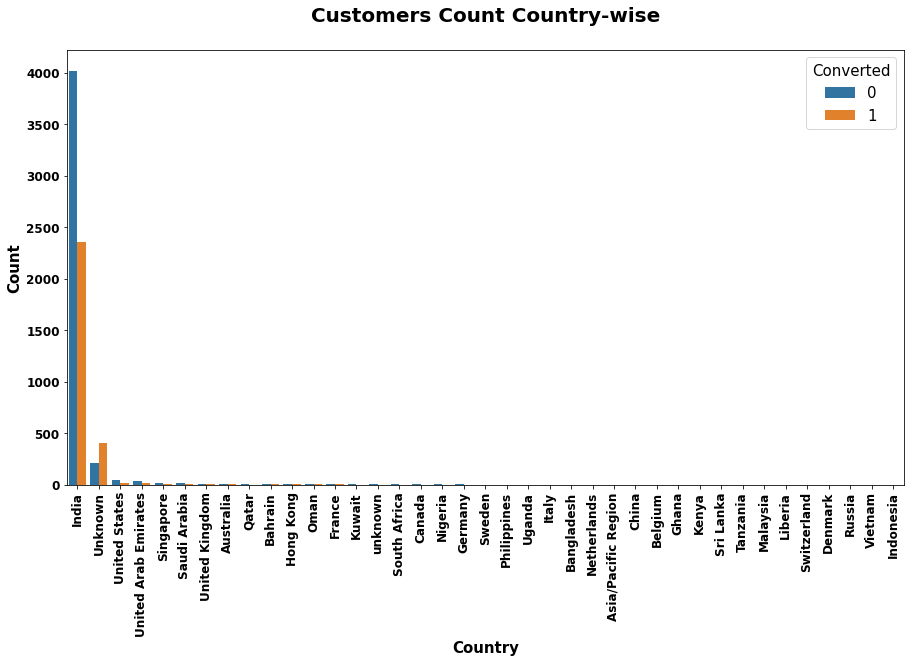

In [34]:
fig = plt.figure(figsize=(15,8))

country_order = leads_df['Country'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Country', hue='Converted', order=country_order)
#Title
plt.title('Customers Count Country-wise\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Country', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)
plt.show()

### Observation:
- As we can see here that most of the customers belong to **India** and very less in number from other countries.
- Most of the countries (lower in rank) are having only one customer each.

## <font color='MidnightBlue'>Lead Origin and Lead Source</font>

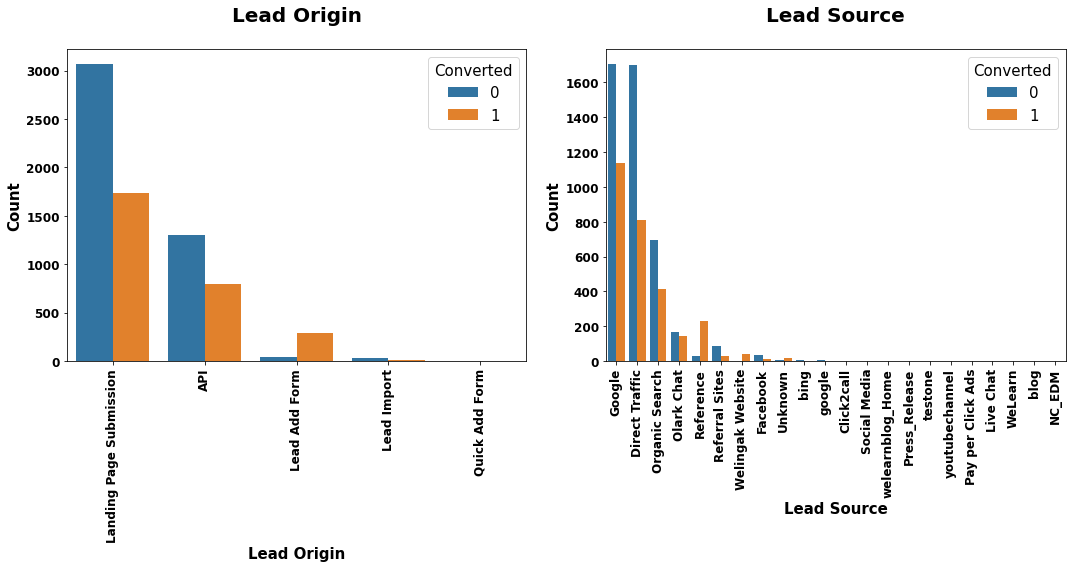

In [35]:
fig = plt.figure(figsize=(15,8))

# Lead Origin
plt.subplot(1,2,1)
leadorigin_order = leads_df['Lead Origin'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Lead Origin', hue='Converted', order=leadorigin_order)
#Title
plt.title('Lead Origin\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Lead Origin', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)

# Lead Source
plt.subplot(1,2,2)
leadsource_order = leads_df['Lead Source'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Lead Source', hue='Converted', order=leadsource_order)
#Title
plt.title('Lead Source\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Lead Source', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)
fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

### Observation:
- Customers under **'Landing Page Submission'** origin category are higher in total number as well as conversion. Customers who falls under **'Lead Add Form'** category are most likely to get converted.
- Most of the customers got to know the courses through **'Google'** source followed by **'Direct Traffic'** and **'Organic Search'**.

## <font color='MidnightBlue'>Last Activity and Last Notable Activity</font>

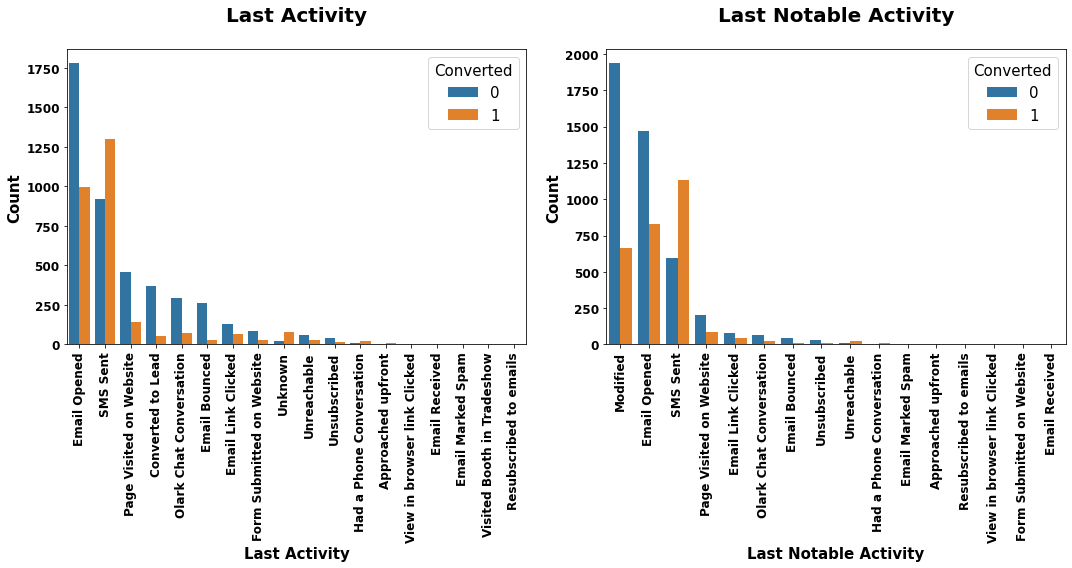

In [36]:
fig = plt.figure(figsize=(15,8))

# Last Activity
plt.subplot(1,2,1)
lastactivity_order = leads_df['Last Activity'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Last Activity', hue='Converted', order=lastactivity_order)
#Title
plt.title('Last Activity\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Last Activity', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)
plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)

# Last Notable Activity
plt.subplot(1,2,2)
lastnoteactivity_order = leads_df['Last Notable Activity'].value_counts(ascending=False).index
sns.countplot(data=leads_df, x='Last Notable Activity', hue='Converted', order=lastnoteactivity_order)
#Title
plt.title('Last Notable Activity\n',fontdict={'fontsize': 20, 'fontweight' : 700})
# Labeling Axes
plt.xlabel('Last Notable Activity', fontdict={'fontsize': 15, 'fontweight' : 600})
plt.ylabel("Count", fontdict={'fontsize': 15, 'fontweight' : 600})
plt.xticks(rotation=90,fontsize=12,fontweight=600)
plt.yticks(fontsize=12,fontweight=600)

plt.legend(title='Converted', loc='upper right', fontsize=15, title_fontsize = 15)
fig.tight_layout(h_pad=2, w_pad=2)
plt.show()

### Observation:
Customers who falls into **'SMS Sent'** and **'Email Opened'** categories are higher in terms of total as well as conversion rate.

## <font color='MidnightBlue'>Binary Cagetorical Variables</font>

In [37]:
bin_variables = ['Newspaper Article','X Education Forums', 'Digital Advertisement', 'Through Recommendations', 'Do Not Email', 'Do Not Call']

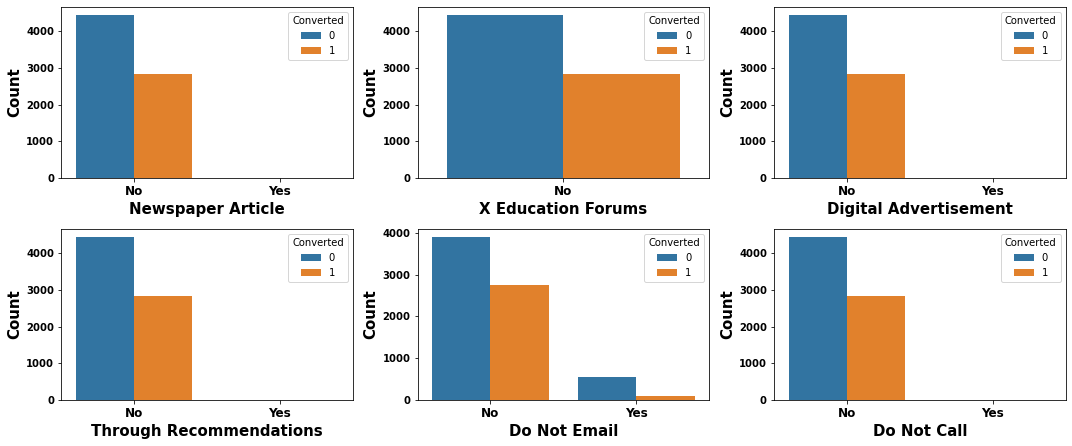

In [38]:
fig=plt.subplots(figsize=(15, 15))

for index, column in enumerate(bin_variables):
    plt.subplot(5, 3, index+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(leads_df[column], hue=leads_df['Converted'])
    plt.xlabel(column, fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.ylabel('Count', fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.xticks(fontsize=12,fontweight=600)
    plt.yticks(fontweight=600)
    plt.legend(title='Converted', loc='upper right', fontsize=10, title_fontsize = 10)
    plt.tight_layout()
    
plt.show()

### Observation
- From the above plots, it seems that very less customers got to know about the courses either through **Newspaper Article** or **Digital Advertisement** or **Recommendations**.
- Very less customers selected/requested to get the course details through **Email** or **Phone Call**.

## <font color='Chocolate'>5.2 Numerical Variables w.r.t. Target Variable</font>

## <font color='MidnightBlue'>Total Visits, Total Time Spent on Website and Page Views per Visit</font>

In [39]:
num_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

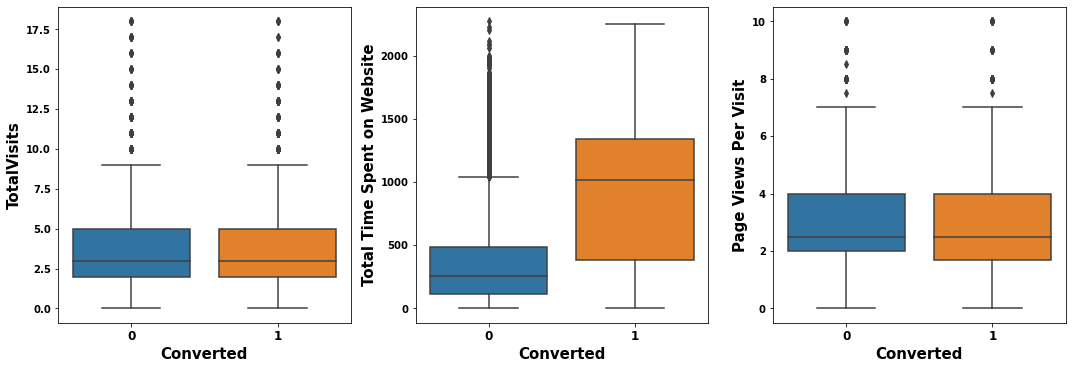

In [40]:
fig=plt.subplots(figsize=(15, 25))

for index, column in enumerate(num_variables):
    plt.subplot(5, 3, index+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(data=leads_df, x='Converted', y=column)
    plt.xlabel('Converted', fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.ylabel(column, fontdict={'fontsize': 15, 'fontweight' : 600})
    plt.xticks(fontsize=12,fontweight=600)
    plt.yticks(fontweight=600)
    plt.tight_layout()
    
plt.show()

### Observation:
- We have an average of around 3 units as total number of customers visited the website as well as page views per visit (both converted and not converted).
- Customers who spent more time on the website are likely have a greater chance to get converted.

## <font color='Chocolate'>5.3 Correlation between Numerical Variables</font>

In [41]:
num_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
leads_numericalvars_corr = leads_df[num_variables].corr()

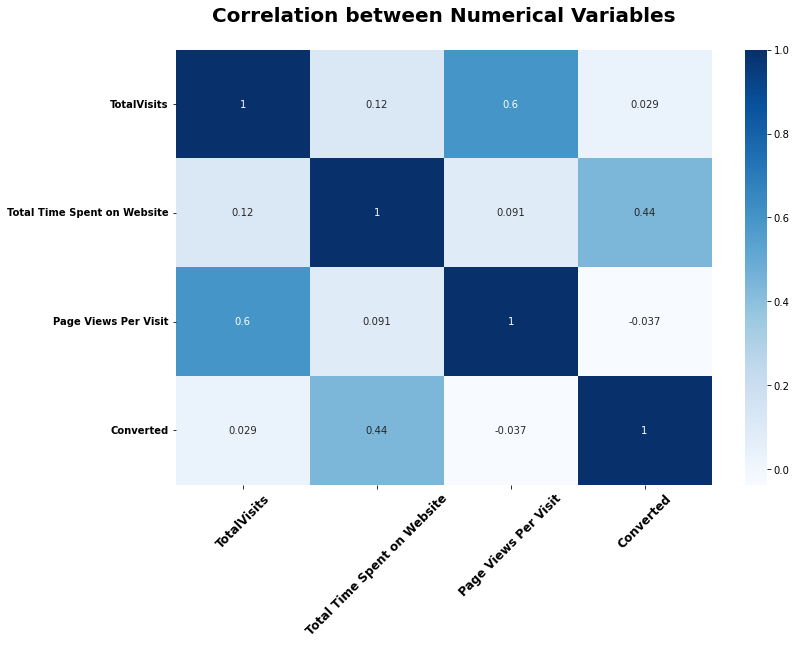

In [42]:
plt.figure(figsize=(12,8))

sns.heatmap(leads_numericalvars_corr,cmap='Blues',annot=True)
plt.xticks(rotation=45,fontsize=12,fontweight=600)
plt.yticks(fontweight=600)
plt.title('Correlation between Numerical Variables\n',fontdict={'fontsize': 20, 'fontweight' : 700})

plt.show()

### Observation:
- Here we can see that **'TotalVisits'** and **'Page Views Per Visit'** variables are highly correlated to each other. So, one of them can be dropped during linear regression model building process.
- There is a good correlation between **'Total Time Spent on Website' (Independent)** and **'Converted' (Target)** variables.

# <font color='Chocolate'>6. DATA PREPARATION FOR BUILDING MODEL</font>

Now we need to convert the dataset to a proper format that suits for building Logistic Regression Model.
- **Drop 'X Education Forums' variable**
- **Convert binary categorical variables values to 0's and 1's**
- **Create Dummy Variables for multi-level categorical variables**

## <font color='Chocolate'>6.1 Drop 'X Education Forums' variable</font>

As we have noticed during EDA process (Data Visualization), we have only one outcome for **'X Education Forums'** i.e., **'No'**. So, it is better to drop this variable as it can't serve anything for further analysis.

In [43]:
leads_df.drop(labels='X Education Forums', axis=1, inplace=True)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Modified


In [44]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7281 non-null   object 
 1   Lead Source                                    7281 non-null   object 
 2   Do Not Email                                   7281 non-null   object 
 3   Do Not Call                                    7281 non-null   object 
 4   Converted                                      7281 non-null   int64  
 5   TotalVisits                                    7281 non-null   float64
 6   Total Time Spent on Website                    7281 non-null   int64  
 7   Page Views Per Visit                           7281 non-null   float64
 8   Last Activity                                  7281 non-null   object 
 9   Country                                        7281 

In [45]:
leads_df.shape

(7281, 20)

## <font color='Chocolate'>6.2 Convert Binary Categorical Variables values to 0's and 1's</font>

In [46]:
bin_variables = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

In [47]:
for column in bin_variables:
    leads_df[column].replace({'No':0, 'Yes':1}, inplace=True)

leads_df[bin_variables] = leads_df[bin_variables].astype('int64')

In [48]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified


In [49]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7281 non-null   object 
 1   Lead Source                                    7281 non-null   object 
 2   Do Not Email                                   7281 non-null   int64  
 3   Do Not Call                                    7281 non-null   int64  
 4   Converted                                      7281 non-null   int64  
 5   TotalVisits                                    7281 non-null   float64
 6   Total Time Spent on Website                    7281 non-null   int64  
 7   Page Views Per Visit                           7281 non-null   float64
 8   Last Activity                                  7281 non-null   object 
 9   Country                                        7281 

In [50]:
for column in bin_variables:
    print(leads_df[column].value_counts())

0    6645
1     636
Name: Do Not Email, dtype: int64
0    7279
1       2
Name: Do Not Call, dtype: int64
0    7268
1      13
Name: Search, dtype: int64
0    7280
1       1
Name: Newspaper Article, dtype: int64
0    7280
1       1
Name: Newspaper, dtype: int64
0    7278
1       3
Name: Digital Advertisement, dtype: int64
0    7275
1       6
Name: Through Recommendations, dtype: int64
0    4460
1    2821
Name: A free copy of Mastering The Interview, dtype: int64


## <font color='Chocolate'>6.3 Create Dummy Variables for Multi-level Categorical Variables</font>

In [51]:
categorical_variables = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']

In [52]:
dummy_df = pd.get_dummies(leads_df[categorical_variables], drop_first=True)
leads_df = pd.concat([leads_df,dummy_df],axis=1)

**We have now created dummy variables and concatenated to lead score dataset. We no longer needed to have original categorical variables, so let's drop them from the dataset.**

In [53]:
leads_df.drop(labels=categorical_variables, axis=1, inplace=True)

In [54]:
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0

In [55]:
leads_df.shape

(7281, 134)

In [56]:
leads_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7281 entries, 0 to 9239
Data columns (total 134 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Do Not Email                                                             int64  
 1    Do Not Call                                                              int64  
 2    Converted                                                                int64  
 3    TotalVisits                                                              float64
 4    Total Time Spent on Website                                              int64  
 5    Page Views Per Visit                                                     float64
 6    Search                                                                   int64  
 7    Newspaper Article                                                        int64  
 8    Newspaper       

**We have removed all the original categorical variables from the dataset which are no longer useful to us. Now let's start building the logistic regression model.**

# <font color='Chocolate'>7. LOGISTIC REGRESSION MODEL</font>

## <font color='Chocolate'>7.1 Splitting the Data into Training and Testing Sets</font>

In [57]:
# We pass random_state inside train_test_split function so that the train and test data set always have the same rows, respectively
np.random.seed(0)
leadscore_train, leadscore_test = train_test_split(leads_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
leadscore_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5290,0,0,1,7.0,1123,7.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
320,0,0,1,6.0,863,6.0,0,0,0,0,0,1

In [59]:
leadscore_train.shape

(5096, 134)

In [60]:
leadscore_train.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 5290 to 7082
Data columns (total 134 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Do Not Email                                                             int64  
 1    Do Not Call                                                              int64  
 2    Converted                                                                int64  
 3    TotalVisits                                                              float64
 4    Total Time Spent on Website                                              int64  
 5    Page Views Per Visit                                                     float64
 6    Search                                                                   int64  
 7    Newspaper Article                                                        int64  
 8    Newspaper    

In [61]:
leadscore_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2268,0,0,1,2.0,872,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4986,0,0,0,4.0,948,4.0,0,0,0,0,0,0

In [62]:
leadscore_test.shape

(2185, 134)

In [63]:
leadscore_test.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 2268 to 1424
Data columns (total 134 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Do Not Email                                                             int64  
 1    Do Not Call                                                              int64  
 2    Converted                                                                int64  
 3    TotalVisits                                                              float64
 4    Total Time Spent on Website                                              int64  
 5    Page Views Per Visit                                                     float64
 6    Search                                                                   int64  
 7    Newspaper Article                                                        int64  
 8    Newspaper    

## <font color='Chocolate'>7.2 Rescale the Training Set - MinMax Scaler</font>

In [64]:
scaler = MinMaxScaler()

In [65]:
# Apply MinMaxScaler to all the continuous numerical variables
numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
leadscore_train[numerical_vars] = scaler.fit_transform(leadscore_train[numerical_vars])

In [66]:
leadscore_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5290,0,0,1,0.388889,0.494278,0.70,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
320,0,0,1,0.333333,0.37

In [67]:
leadscore_train[numerical_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5096.000000,5096.000000,5096.000000
mean,0.217316,0.266253,0.279825
std,0.159416,0.240471,0.176242
min,0.000000,0.000000,0.000000
25%,0.111111,0.063820,0.200000
50%,0.166667,0.164173,0.233000
75%,0.277778,0.473151,0.400000
max,1.000000,1.000000,1.000000


## <font color='Chocolate'>7.3 Build Model from Train set</font>

## <font color='MidnightBlue'>Divide the Training set into X and Y sets</font>

In [68]:
y_train = leadscore_train.pop('Converted')
X_train = leadscore_train

In [69]:
y_train.head()

5290    1
320     1
2135    1
713     1
8717    0
Name: Converted, dtype: int64

In [70]:
y_train.shape

(5096,)

In [71]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5290,0,0,0.388889,0.494278,0.70,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
320,0,0,0.333333,0.379842,0.60,0,0,

In [72]:
X_train.shape

(5096, 133)

## <font color='MidnightBlue'>Selecting Significant Independent Variables using RFE</font>

- **We have 133 independent variables available in train set. Analyzing all the variables will be difficult.**
- **So, we use Recursive Feature Elimination (RFE) utility (from sklearn) to select top 15 independent variables that are significant for the prediction in an automated fashion.**
- **Later we eliminate the variables one by one manually based on P-Value and Variance Inflation Factor (VIF).**
- **Cut-off values : P-Value < 0.05 and VIF < 5.**

In [73]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 83),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Search', False, 23),
 ('Newspaper Article', False, 19),
 ('Newspaper', False, 12),
 ('Digital Advertisement', False, 31),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 64),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Origin_Quick Add Form', False, 82),
 ('Lead Source_Direct Traffic', False, 47),
 ('Lead Source_Facebook', False, 65),
 ('Lead Source_Google', False, 69),
 ('Lead Source_Live Chat', False, 90),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', False, 67),
 ('Lead Source_Organic Search', False, 68),
 ('Lead Source_Pay per Click Ads', False, 115),
 ('Lead Source_Press_Release', False, 103),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Si

In [75]:
# Copy all the columns that are selected through RFE in a separate variable
col = X_train.columns[rfe.support_]

In [76]:
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Country_Qatar', 'Country_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')


## <font color='MidnightBlue'>Model Build - 1</font>

In [77]:
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logreg_model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

logreg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5096
Model:                            GLM   Df Residuals:                     5080
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2226.6
Date:                Sat, 11 Jun 2022   Deviance:                       4453.1
Time:                        22:54:56   Pearson chi2:                 5.30e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8395      0.086     -9.764      0.000      -1.008      -0.671
Do Not Email                                            -1.3391      0.201     -6.653      0.000      -1.734      -0.945
Total Time Spent on Website                              4.5259      0.167     27.127      0.000       4.199       4.853
Lead Origin_Lead Add Form                                2.0004      0.279      7.182      0.000       1.454       2.546
Lead Source_Welingak Website                            23.1469   2.01e+04      0.001      0.999   -3.94e+04    3.94e+04
Last Activity_Email Bounced                             -1.2621      0.372     -3.391      0.001      -1.992      -0.533
Country_Qatar                                          -24.3161   3.74e+04     -0.001      0.999   -7.33e+04    7.32e+04
Country_Unknown                                          1.3870      0.175      7.920      0.000       1.044       1.730
What is your current occupation_Housewife               25.2164   4.07e+04      0.001      1.000   -7.98e+04    7.98e+04
What is your current occupation_Working Professional     2.5960      0.185     14.007      0.000       2.233       2.959
Last Notable Activity_Email Link Clicked                -1.4022      0.293     -4.791      0.000      -1.976      -0.829
Last Notable Activity_Email Opened                      -1.3195      0.096    -13.712      0.000      -1.508      -1.131
Last Notable Activity_Had a Phone Conversation          23.8260   3.75e+04      0.001      0.999   -7.35e+04    7.35e+04
Last Notable Activity_Modified                          -1.9134      0.101    -18.949      0.000      -2.111      -1.715
Last Notable Activity_Olark Chat Conversation           -2.4139      0.374     -6.446      0.000      -3.148      -1.680
Last Notable Activity_Page Visited on Website           -1.7657      0.210     -8.425      0.000      -2.176      -1.355
========================================================================================================================
"""

## VIF Check: Model Build - 1

In [78]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,2.08
6,Country_Unknown,1.99
0,Do Not Email,1.76
4,Last Activity_Email Bounced,1.73
1,Total Time Spent on Website,1.63
12,Last Notable Activity_Modified,1.41
10,Last Notable Activity_Email Opened,1.27
3,Lead Source_Welingak Website,1.17
8,What is your current occupation_Working Profes...,1.14
14,Last Notable Activity_Page Visited on Website,1.06


### Observation:
In Model Build - 1, we can see that we have high P-Value for **'What is your current occupation_Housewife'** variable. So, we proceed dropping this variable.

## <font color='MidnightBlue'>Model Build - 2</font>

In [79]:
col = col.drop('What is your current occupation_Housewife')
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logreg_model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

logreg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5096
Model:                            GLM   Df Residuals:                     5081
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2234.6
Date:                Sat, 11 Jun 2022   Deviance:                       4469.2
Time:                        22:54:57   Pearson chi2:                 5.33e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8359      0.086     -9.730      0.000      -1.004      -0.668
Do Not Email                                            -1.3419      0.201     -6.667      0.000      -1.736      -0.947
Total Time Spent on Website                              4.5161      0.167     27.123      0.000       4.190       4.842
Lead Origin_Lead Add Form                                2.0655      0.277      7.449      0.000       1.522       2.609
Lead Source_Welingak Website                            23.0922   2.01e+04      0.001      0.999   -3.94e+04    3.94e+04
Last Activity_Email Bounced                             -1.2666      0.372     -3.402      0.001      -1.996      -0.537
Country_Qatar                                          -24.3195   3.74e+04     -0.001      0.999   -7.33e+04    7.33e+04
Country_Unknown                                          1.3632      0.175      7.808      0.000       1.021       1.705
What is your current occupation_Working Professional     2.5893      0.185     13.972      0.000       2.226       2.953
Last Notable Activity_Email Link Clicked                -1.3850      0.290     -4.769      0.000      -1.954      -0.816
Last Notable Activity_Email Opened                      -1.3124      0.096    -13.656      0.000      -1.501      -1.124
Last Notable Activity_Had a Phone Conversation          23.8246   3.75e+04      0.001      0.999   -7.35e+04    7.35e+04
Last Notable Activity_Modified                          -1.9028      0.101    -18.884      0.000      -2.100      -1.705
Last Notable Activity_Olark Chat Conversation           -2.4090      0.375     -6.432      0.000      -3.143      -1.675
Last Notable Activity_Page Visited on Website           -1.7646      0.210     -8.422      0.000      -2.175      -1.354
========================================================================================================================
"""

## VIF Check: Model Build - 2

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,2.07
6,Country_Unknown,1.99
0,Do Not Email,1.76
4,Last Activity_Email Bounced,1.73
1,Total Time Spent on Website,1.63
11,Last Notable Activity_Modified,1.41
9,Last Notable Activity_Email Opened,1.27
3,Lead Source_Welingak Website,1.17
7,What is your current occupation_Working Profes...,1.14
13,Last Notable Activity_Page Visited on Website,1.06


### Observation:
In Model Build - 2, we can see that we have high P-Value for **'Lead Source_Welingak Website'** variable. So, we proceed dropping this variable.

## <font color='MidnightBlue'>Model Build - 3</font>

In [81]:
col = col.drop('Lead Source_Welingak Website')
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logreg_model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

logreg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5096
Model:                            GLM   Df Residuals:                     5082
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2241.3
Date:                Sat, 11 Jun 2022   Deviance:                       4482.6
Time:                        22:54:57   Pearson chi2:                 5.52e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8364      0.086     -9.737      0.000      -1.005      -0.668
Do Not Email                                            -1.3352      0.201     -6.650      0.000      -1.729      -0.942
Total Time Spent on Website                              4.5127      0.166     27.119      0.000       4.187       4.839
Lead Origin_Lead Add Form                                2.3630      0.271      8.734      0.000       1.833       2.893
Last Activity_Email Bounced                             -1.3162      0.375     -3.508      0.000      -2.052      -0.581
Country_Qatar                                          -23.3182   2.27e+04     -0.001      0.999   -4.45e+04    4.44e+04
Country_Unknown                                          1.3526      0.174      7.783      0.000       1.012       1.693
What is your current occupation_Working Professional     2.5813      0.186     13.901      0.000       2.217       2.945
Last Notable Activity_Email Link Clicked                -1.4016      0.292     -4.793      0.000      -1.975      -0.829
Last Notable Activity_Email Opened                      -1.3113      0.096    -13.647      0.000      -1.500      -1.123
Last Notable Activity_Had a Phone Conversation          22.8267   2.28e+04      0.001      0.999   -4.46e+04    4.46e+04
Last Notable Activity_Modified                          -1.8971      0.101    -18.841      0.000      -2.094      -1.700
Last Notable Activity_Olark Chat Conversation           -2.3629      0.367     -6.430      0.000      -3.083      -1.643
Last Notable Activity_Page Visited on Website           -1.7519      0.208     -8.409      0.000      -2.160      -1.344
========================================================================================================================
"""

## VIF Check: Model Build - 3

In [82]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Country_Unknown,1.99
2,Lead Origin_Lead Add Form,1.90
0,Do Not Email,1.76
3,Last Activity_Email Bounced,1.73
1,Total Time Spent on Website,1.63
10,Last Notable Activity_Modified,1.41
8,Last Notable Activity_Email Opened,1.27
6,What is your current occupation_Working Profes...,1.13
12,Last Notable Activity_Page Visited on Website,1.06
11,Last Notable Activity_Olark Chat Conversation,1.02


### Observation:
In Model Build - 3, we can see that we have high P-Value for **'Country_Qatar'** variable. So, we proceed dropping this variable.

## <font color='MidnightBlue'>Model Build - 4</font>

In [83]:
col = col.drop('Country_Qatar')
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logreg_model4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

logreg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5096
Model:                            GLM   Df Residuals:                     5083
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2245.7
Date:                Sat, 11 Jun 2022   Deviance:                       4491.4
Time:                        22:54:57   Pearson chi2:                 5.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8401      0.086     -9.795      0.000      -1.008      -0.672
Do Not Email                                            -1.3354      0.201     -6.660      0.000      -1.728      -0.942
Total Time Spent on Website                              4.5056      0.166     27.123      0.000       4.180       4.831
Lead Origin_Lead Add Form                                2.3624      0.270      8.735      0.000       1.832       2.893
Last Activity_Email Bounced                             -1.3130      0.375     -3.501      0.000      -2.048      -0.578
Country_Unknown                                          1.3537      0.174      7.792      0.000       1.013       1.694
What is your current occupation_Working Professional     2.5842      0.186     13.921      0.000       2.220       2.948
Last Notable Activity_Email Link Clicked                -1.3964      0.292     -4.777      0.000      -1.969      -0.823
Last Notable Activity_Email Opened                      -1.3117      0.096    -13.670      0.000      -1.500      -1.124
Last Notable Activity_Had a Phone Conversation          21.8312   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
Last Notable Activity_Modified                          -1.8919      0.101    -18.813      0.000      -2.089      -1.695
Last Notable Activity_Olark Chat Conversation           -2.3569      0.367     -6.415      0.000      -3.077      -1.637
Last Notable Activity_Page Visited on Website           -1.7462      0.208     -8.385      0.000      -2.154      -1.338
========================================================================================================================
"""

## VIF Check: Model Build - 4

In [84]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Unknown,1.99
2,Lead Origin_Lead Add Form,1.90
0,Do Not Email,1.76
3,Last Activity_Email Bounced,1.73
1,Total Time Spent on Website,1.63
9,Last Notable Activity_Modified,1.41
7,Last Notable Activity_Email Opened,1.27
5,What is your current occupation_Working Profes...,1.13
11,Last Notable Activity_Page Visited on Website,1.06
10,Last Notable Activity_Olark Chat Conversation,1.02


### Observation:
In Model Build - 4, we can see that we have high P-Value for **'Last Notable Activity_Had a Phone Conversation'** variable. So, we proceed dropping this variable.

## <font color='MidnightBlue'>Model Build - 5</font>

In [85]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logreg_model5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()

logreg_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5096
Model:                            GLM   Df Residuals:                     5084
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2249.4
Date:                Sat, 11 Jun 2022   Deviance:                       4498.9
Time:                        22:54:57   Pearson chi2:                 5.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8252      0.086     -9.650      0.000      -0.993      -0.658
Do Not Email                                            -1.3448      0.201     -6.705      0.000      -1.738      -0.952
Total Time Spent on Website                              4.5017      0.166     27.124      0.000       4.176       4.827
Lead Origin_Lead Add Form                                2.3637      0.271      8.737      0.000       1.833       2.894
Last Activity_Email Bounced                             -1.3099      0.375     -3.493      0.000      -2.045      -0.575
Country_Unknown                                          1.3507      0.174      7.773      0.000       1.010       1.691
What is your current occupation_Working Professional     2.5828      0.186     13.915      0.000       2.219       2.947
Last Notable Activity_Email Link Clicked                -1.4098      0.292     -4.824      0.000      -1.983      -0.837
Last Notable Activity_Email Opened                      -1.3252      0.096    -13.831      0.000      -1.513      -1.137
Last Notable Activity_Modified                          -1.9048      0.100    -18.963      0.000      -2.102      -1.708
Last Notable Activity_Olark Chat Conversation           -2.3691      0.367     -6.450      0.000      -3.089      -1.649
Last Notable Activity_Page Visited on Website           -1.7588      0.208     -8.449      0.000      -2.167      -1.351
========================================================================================================================
"""

## VIF Check: Model Build - 5

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Country_Unknown,1.99
2,Lead Origin_Lead Add Form,1.90
0,Do Not Email,1.76
3,Last Activity_Email Bounced,1.73
1,Total Time Spent on Website,1.63
8,Last Notable Activity_Modified,1.41
7,Last Notable Activity_Email Opened,1.27
5,What is your current occupation_Working Profes...,1.13
10,Last Notable Activity_Page Visited on Website,1.06
9,Last Notable Activity_Olark Chat Conversation,1.02


### Observation:
In Model Build - 5, we can see that all the variables contain P-Value < 0.05 and VIF < 5. This model looks good for prediction.

## <font color='Chocolate'>7.4 Prediction on Train Set</font>

In [87]:
y_train_pred = logreg_model5.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

### Creating a dataframe with actual converted value and predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.376389
1,1,0.391628
2,1,0.311065
3,1,0.248015
4,0,0.136307


### Let us predict the converted flag value by considering probability cut-off as 0.5

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,1,0.376389,0
1,1,0.391628,0
2,1,0.311065,0
3,1,0.248015,0
4,0,0.136307,0


## <font color='Chocolate'>7.5 Model Evaluation</font>

## <font color='MidnightBlue'>Confusion Matrix</font>

In [90]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
confusion

array([[2718,  399],
       [ 650, 1329]], dtype=int64)

|**Actual/Predicted**|**Predicted: Not_Converted**|**Predicted: Converted**|
|:---|:---|:---|
|**Actual: Not_Converted**|**2718**|**399**|
|**Actual: Converted**|**650**|**1329**|

### Observation:
There are around 650 customers which are actually converted but our model predicted as not converted. This number is quite high, probably we need to reduce our prediction cut-off value to make more accurate. But before that let's check the current model accuracy.

## <font color='MidnightBlue'>Model Accuracy</font>

In [91]:
# Check the overall accuracy
accuracy = round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])*100, 3)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 79.415


### Observation:
We got around 79.4% prediction accuracy which is performing quite decent. Now let us also check sensitivity and specificity.

## <font color='MidnightBlue'>Sensitivity and Specificity</font>

In [92]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [93]:
# Calculate Sensitivity
print(f'Sensitivity: {round(TP / float(TP+FN)*100,3)}')

Sensitivity: 67.155


In [94]:
# Calculate Specificity
print(f'Specificity: {round(TN / float(TN+FP)*100,3)}')

Specificity: 87.199


### Observation:
- Here we got around **67.2%** sensitivity and **87.2%** specificity.
- Although we got good accuracy of **79.4%**, our model predicts only **67.2%** converted customers correctly (Sensitivity). So, we need to make sure to increase sensitivity percentage. As sensitivity increases then obviously specificity drops.

## <font color='Chocolate'>7.6 Calculate Optimal Cut-off value (ROC curve)</font>

## <font color='MidnightBlue'>Plot ROC curve to check the accuracy of current model</font>

In [95]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

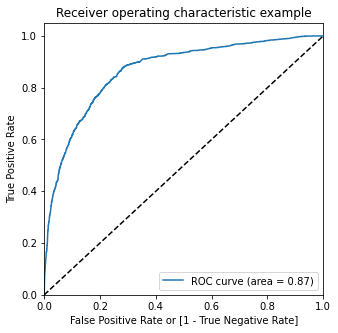

In [96]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

### Observation:
We got ROC curve area value as **0.87** which shows good accuracy.

## <font color='MidnightBlue'>Find Optimal Cut-off value</font>

**We need to find the optimal cut-off value which gives balanced sensitivity and specifity probability values.**

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.376389,0,1,1,1,1,0,0,0,0,0,0
1,1,0.391628,0,1,1,1,1,0,0,0,0,0,0
2,1,0.311065,0,1,1,1,1,0,0,0,0,0,0
3,1,0.248015,0,1,1,1,0,0,0,0,0,0,0
4,0,0.136307,0,1,1,0,0,0,0,0,0,0,0


In [98]:
# Calculate Accuracy, Sensitivity and Specificity for each probability cut-off values and store in a dataframe
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.388344     1.000000     0.000000
0.1          0.1  0.548273     0.970187     0.280398
0.2          0.2  0.748626     0.911066     0.645492
0.3          0.3  0.780808     0.863062     0.728585
0.4          0.4  0.794349     0.764022     0.813603
0.5          0.5  0.794152     0.671551     0.871992
0.6          0.6  0.784733     0.584639     0.911774
0.7          0.7  0.767661     0.490652     0.943535
0.8          0.8  0.737834     0.371400     0.970484
0.9          0.9  0.686813     0.211723     0.988450


**Plot Accuracy, Sensitivity and Specificity for various probabilities**

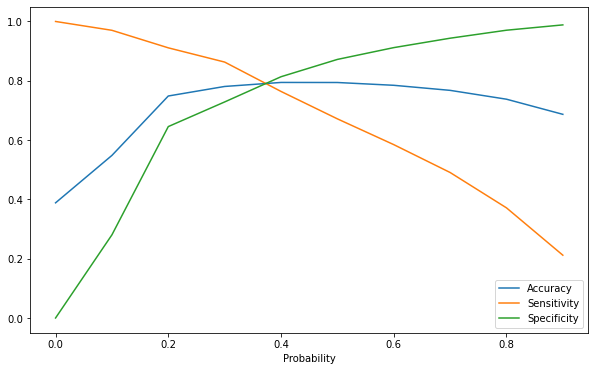

In [99]:
plt.rcParams["figure.figsize"] = (10,6)
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

### Observation:
From the above plot, we can see that **Accuracy**, **Sensitivity** and **Specificity** lines intersect inbetween the probabilities of 0.3 and 0.4. So, let's consider cut-off value as **0.35**.

## <font color='Chocolate'>7.7 Predict Train Set with New Cut-Off Value</font>

In [100]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.376389,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.391628,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.311065,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.248015,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.136307,0,1,1,0,0,0,0,0,0,0,0,0


## <font color='Chocolate'>7.8 Recheck Accuracy, Sensitivity and Specificity with New Cut-Off value</font>

## <font color='MidnightBlue'>Confusion Matrix</font>

In [101]:
# Creating confusion matrix 
confusion_new = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'] )
confusion_new

array([[2420,  697],
       [ 371, 1608]], dtype=int64)

|**Actual/Predicted**|**Predicted: Not_Converted**|**Predicted: Converted**|
|:---|:---|:---|
|**Actual: Not_Converted**|**2420**|**697**|
|**Actual: Converted**|**371**|**1608**|

## <font color='MidnightBlue'>Model Accuracy</font>

In [102]:
# Check the overall accuracy
accuracy = round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])*100, 3)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 79.042


## <font color='MidnightBlue'>Sensitivity and Specificity</font>

In [103]:
# Substituting the value of true positive
TP = confusion_new[1,1]
# Substituting the value of true negatives
TN = confusion_new[0,0]
# Substituting the value of false positives
FP = confusion_new[0,1] 
# Substituting the value of false negatives
FN = confusion_new[1,0]

In [104]:
# Calculate Sensitivity
print(f'Sensitivity: {round(TP / float(TP+FN)*100,3)}')

Sensitivity: 81.253


In [105]:
# Calculate Specificity
print(f'Specificity: {round(TN / float(TN+FP)*100,3)}')

Specificity: 77.639


### Observation:
With the new cut-off probability value (0.35), we got the following results:
- **Model Accuracy: 79%**
- **Sensitivity: 81.25%**
- **Specificity: 77.64%**

Now this model looks good for prediction.

**Now the predictive power looks good and let's proceed predicting test set.**

## <font color='Chocolate'>7.9 Rescale the Test Set - MinMax Scaler</font>

In [106]:
leadscore_test[numerical_vars] = scaler.transform(leadscore_test[numerical_vars])
leadscore_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2268,0,0,1,0.111111,0.383803,0.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4986,0,0,0,0.222222,0.41

In [107]:
leadscore_test[numerical_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2185.000000,2185.000000,2185.000000
mean,0.221103,0.270229,0.288717
std,0.152845,0.243600,0.175394
min,0.000000,0.000000,0.000000
25%,0.111111,0.063380,0.200000
50%,0.166667,0.161532,0.250000
75%,0.277778,0.485475,0.400000
max,1.000000,0.955106,1.000000


## <font color='Chocolate'>7.10 Prediction on Test Set</font>

## <font color='MidnightBlue'>Divide Test Set into X and Y sets</font>

In [108]:
y_test = leadscore_test.pop('Converted')
X_test = leadscore_test

In [109]:
y_test.head()

2268    1
4986    0
6738    0
5919    0
5453    1
Name: Converted, dtype: int64

In [110]:
y_test.shape

(2185,)

In [111]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2268,0,0,0.111111,0.383803,0.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4986,0,0,0.222222,0.417254,0.4,0,0,0

In [112]:
X_test.shape

(2185, 133)

## <font color='MidnightBlue'>Make Predictions on Test Set</font>

In [113]:
X_test_rfe = X_test[col]

X_test_sm = sm.add_constant(X_test_rfe)

X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Country_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
2268,1.0,0,0.383803,0,0,0,0,0,1,0,0,0
4986,1.0,0,0.417254,0,0,0,0,0,0,0,0,0
6738,1.0,0,0.152289,0,0,0,0,0,0,0,0,0
5919,1.0,0,0.051937,0,0,0,0,0,1,0,0,0
5453,1.0,0,0.657570,0,0,0,1,0,0,0,0,0


In [114]:
y_test_pred = logreg_model5.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

### Creating a dataframe with actual converted value and predicted probabilities

In [115]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Converted_Prob
0,1,0.395885
1,0,0.741387
2,0,0.465155
3,0,0.128240
4,1,0.991145


### Now predict the converted flag value by with probability cut-off as 0.35 (Calculated Optimal cut-off from train set)

In [116]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Final_Predicted
0,1,0.395885,1
1,0,0.741387,1
2,0,0.465155,1
3,0,0.128240,0
4,1,0.991145,1


## <font color='Chocolate'>7.11 Model Evaluation - Test Set</font>

## <font color='MidnightBlue'>Confusion Matrix</font>

In [117]:
# Creating confusion matrix 
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'] )
confusion_test

array([[991, 332],
       [155, 707]], dtype=int64)

|**Actual/Predicted**|**Predicted: Not_Converted**|**Predicted: Converted**|
|:---|:---|:---|
|**Actual: Not_Converted**|**991**|**332**|
|**Actual: Converted**|**155**|**707**|

## <font color='MidnightBlue'>Model Accuracy</font>

In [118]:
# Check the overall accuracy
accuracy = round(metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Final_Predicted'])*100, 3)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 77.712


## <font color='MidnightBlue'>Sensitivity and Specificity</font>

In [119]:
# Substituting the value of true positive
TP = confusion_test[1,1]
# Substituting the value of true negatives
TN = confusion_test[0,0]
# Substituting the value of false positives
FP = confusion_test[0,1] 
# Substituting the value of false negatives
FN = confusion_test[1,0]

In [120]:
# Calculate Sensitivity
print(f'Sensitivity: {round(TP / float(TP+FN)*100,3)}')

Sensitivity: 82.019


In [121]:
# Calculate Specificity
print(f'Specificity: {round(TN / float(TN+FP)*100,3)}')

Specificity: 74.906


### Observation:
After prediction in test set, we got the following evaluation results:
- **Model Accuracy: 77.7%**
- **Sensitivity: 82.02%**
- **Specificity: 74.9%**

These results are closer to training set evaluation results and also shows good predictive power.

# <font color='Chocolate'>8. CONCLUSION</font>
1. We can conclude that the final logistic regression model built (Model Build - 5) has a very good predictive power which means that the model isn't fit by chance and well generalized for prediction.
2. For model prediction, we considered the optimal probability cut-off value as **0.35** based on **Sensitivity** and **Specificity** metrics.
3. We got the following model evaluation results for train and test sets:
|**Metrics**|**Train Set**|**Test Set**|
|:---|:---|:---|
|**Model Accuracy**|**79%**|**77.7%**|
|**Sensitivity**|**81.25%**|**82.02%**|
|**Specificity**|**77.64%**|**74.9%**|
4. The top three variables that contributed for prediction are:
    - **'Total Time Spent on Website'**: Coefficient of **4.5017**.
    - **'What is your Current Occupation'(Working Professional)**: Coefficient of **2.5828**.
    - **'Lead Origin'(Lead Add Form)**: Coefficient of **2.3637**.